In [3]:
#Importing the necessary modules to be used

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#loading the data from Documents and printing out the first 5 observations

df = pd.read_csv("Documents/Data Analyst Journey/DataSet/coffee.csv")
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [3]:
#There are 200 rows/observations against 9 columns/ categories
df.shape

(200, 9)

In [7]:
# getting detailed information about the data to help wrangle and explore

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 3 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           120 non-null    object 
 1   Place name       120 non-null    object 
 2   Place type       120 non-null    object 
 3   Rating           120 non-null    float64
 4   Reviews          120 non-null    float64
 5   Delivery option  120 non-null    bool   
 6   Dine in option   120 non-null    object 
 7   Takeout option   120 non-null    object 
dtypes: bool(1), float64(2), object(5)
memory usage: 7.6+ KB


In [6]:
# dropping all missing values in the observation

#df.dropna(inplace = True)

# Dropping the price column cause there's insufficient information for our exploratory analysis

df.drop(columns = ["Price"],inplace =True)

In [7]:
#Coverting 'Dine in option' and 'Takeout option' columns into boolean datatype

df["Takeout option"] = df["Takeout option"].astype(bool)
df["Dine in option"] = df["Dine in option"].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 3 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           120 non-null    object 
 1   Place name       120 non-null    object 
 2   Place type       120 non-null    object 
 3   Rating           120 non-null    float64
 4   Reviews          120 non-null    float64
 5   Delivery option  120 non-null    bool   
 6   Dine in option   120 non-null    bool   
 7   Takeout option   120 non-null    bool   
dtypes: bool(3), float64(2), object(3)
memory usage: 6.0+ KB


In [8]:
# the current state of the data after cleaning 
df.head()

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,False,True,True
5,C,Racers Coffee Shop,Espresso bar,4.6,367.0,False,True,True
6,C,Займемся Кофе,Coffee shop,4.6,200.0,False,True,True
8,C,Кав'ярня My coffee,Coffee shop,4.8,31.0,False,True,True


In [10]:
#Saving to directory

df.to_csv("Documents/Data Analyst Journey/DataSet/coffee_clean.csv",index = False)

In [35]:
#Statistical summary 

df1[["Rating","Reviews"]].describe()


,Rating,Reviews
count,120.000000,120.000000
mean,4.623333,857.291667
std,0.195639,1721.095505
min,4.000000,10.000000
25%,4.500000,184.750000
50%,4.600000,486.500000
75%,4.700000,971.750000
max,5.000000,17937.000000


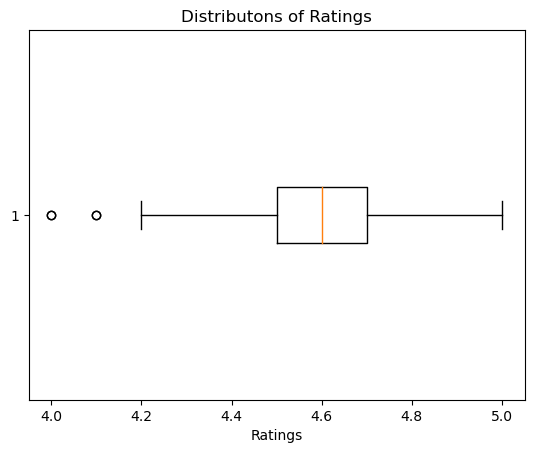

In [3]:
# plotting boxplot of the rating column
df1 = pd.read_csv("Documents/Data Analyst Journey/DataSet/coffee_clean.csv")

plt.boxplot(df1["Rating"], vert=False)
plt.xlabel("Ratings")
plt.title("Distributons of Ratings");


###### From the boxplot it indicates that the rating of the coffee shops are right skewed and there are some outliers 

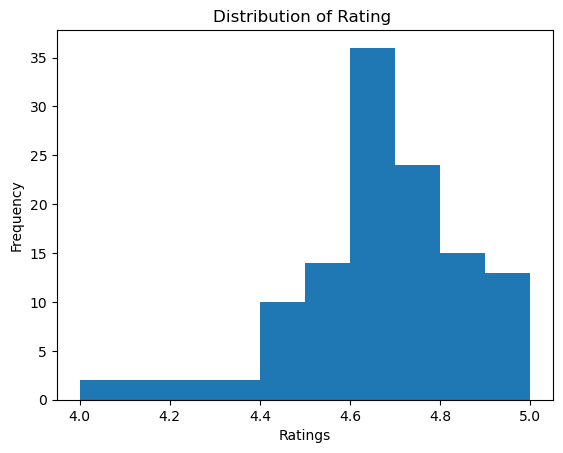

In [4]:
#Creating histogram of 'Rating'

plt.hist(df1["Rating"])
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Rating ");

###### The distribution depicts 4.62 as the highest value rate and also confirms the right skewed analysis from the boxplot.

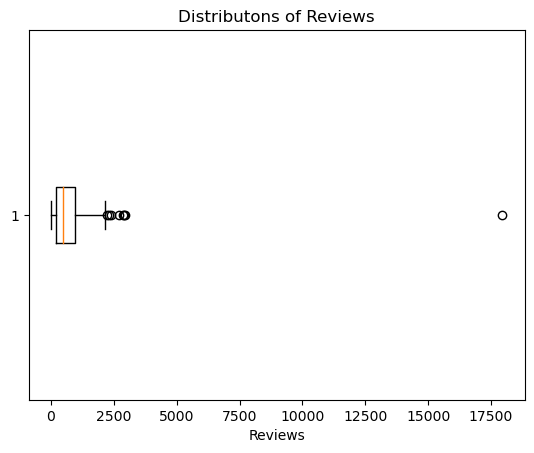

In [8]:
#plotting boxplot of the 'reviews' column
df1 = pd.read_csv("Documents/Data Analyst Journey/DataSet/coffee_clean.csv")

plt.boxplot(df1["Reviews"], vert=False)
plt.xlabel("Reviews")
plt.title("Distributons of Reviews");


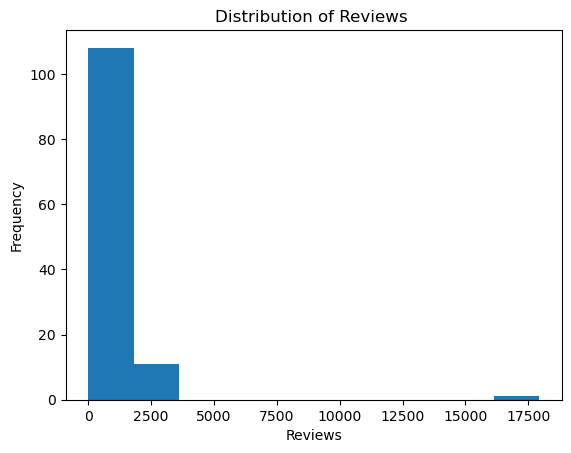

In [9]:
#Creating histogram of 'Reviews'

plt.hist(df1["Reviews"])
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.title("Distribution of Reviews ");

In [6]:
# Finding the number of unique values in the 'place type' column

df1["Place type"].nunique()

4

In [7]:
#Counting the number of observations in the respective 'place types'
df1["Place type"].value_counts().head()

Coffee shop     66
Cafe            39
Espresso bar     8
Others           7
Name: Place type, dtype: int64

In [8]:
#Counting the number of observations in the respestive 'Regions'
df1["Region"].value_counts()

E    19
C    14
D    14
H    14
I    13
G    11
F    10
A     9
J     8
B     8
Name: Region, dtype: int64

In [9]:
#Calculating mean rating by 'place types'

mean_rating_by_place_type = df1.groupby("Place type")["Rating"].mean().sort_values(ascending=False)
mean_rating_by_place_type

Place type
Espresso bar    4.675000
Others          4.671429
Coffee shop     4.643939
Cafe            4.569231
Name: Rating, dtype: float64

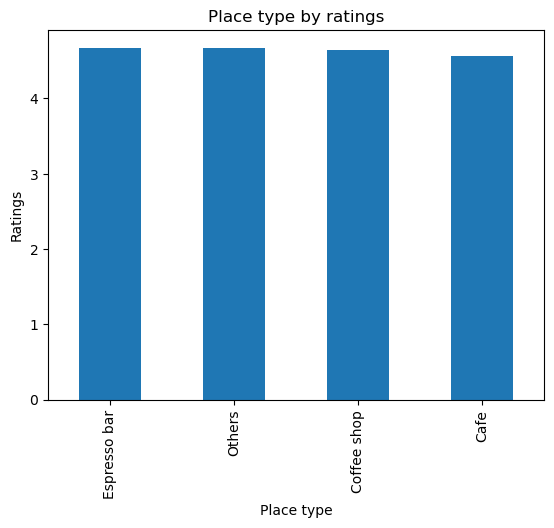

In [6]:
# Creating bar chart of mean rating by place type

mean_rating_by_place_type.plot(kind="bar",
                xlabel= "Place type",
                ylabel = "Ratings",
                title ="Place type by ratings");

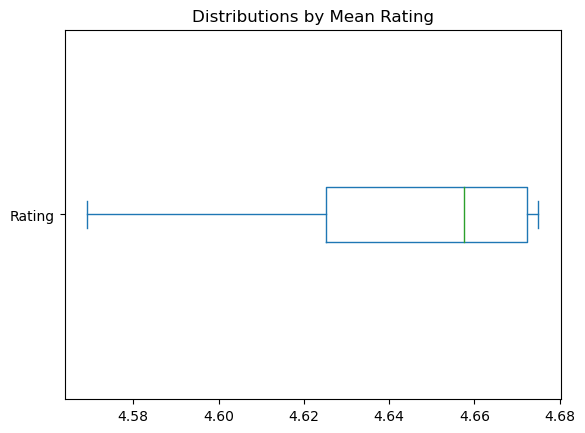

In [10]:
#Creating box plot for rating by 'place type'

mean_rating_by_place_type.plot(kind = "box",
                               vert=False,
                               title="Distributions by Mean Rating"
                              );

In [11]:
#Calculting the mean reviews by place type

mean_reviews_by_place_type = df1.groupby("Place type")["Reviews"].mean().sort_values(ascending=False)
mean_reviews_by_place_type

Place type
Coffee shop     977.681818
Others          941.285714
Espresso bar    830.625000
Cafe            643.948718
Name: Reviews, dtype: float64

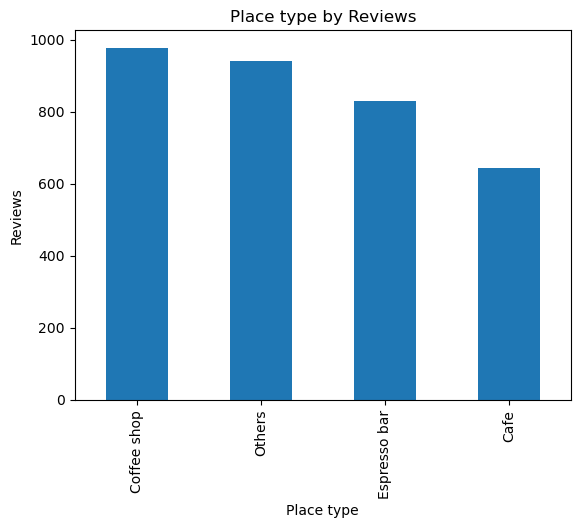

In [12]:
# Creating bar chart for mean reviews by place types

mean_reviews_by_place_type.plot(kind="bar",
                xlabel= "Place type",
                ylabel = "Reviews",
                title ="Place type by Reviews");


###### Among the place types coffee shop has the highest reviews whiles cafe has the least of reviews 

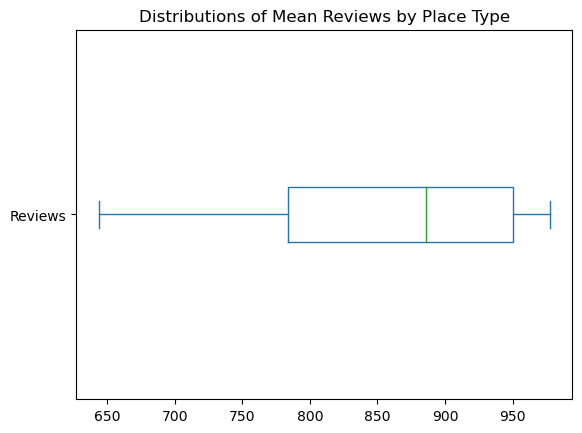

In [13]:
#Creating box plot for mean reviews by place types

mean_reviews_by_place_type.plot(kind = "box", 
                                vert=False,
                               title="Distributions of Mean Reviews by Place Type");

In [14]:
#Calculting the mean reviews by region


mean_reviews_by_region = df1.groupby("Region")["Reviews"].mean().sort_values(ascending=False)
mean_reviews_by_region

Region
E    2040.157895
G     992.636364
H     757.000000
I     737.307692
A     723.000000
J     688.375000
D     626.000000
F     528.900000
B     468.750000
C     228.071429
Name: Reviews, dtype: float64

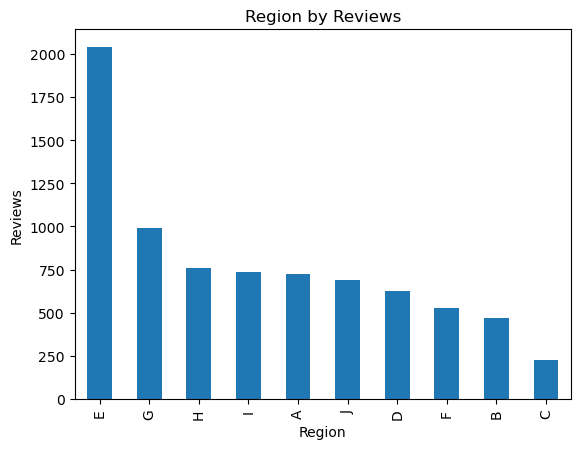

In [15]:
# Creating bar chart for mean reviews by 'region'

mean_reviews_by_region.plot(kind="bar",
                xlabel= "Region",
                ylabel = "Reviews",
                title ="Region by Reviews");

In [18]:
#Calculating correlation between Reviews and Rating 

p_correlation = df1["Reviews"].corr(df1["Rating"])
p_correlation

-0.0416038183493063

###### From the bar chart it clearly indicates region 'E' with the highest reviews as region 'C' with the lowest reviews.

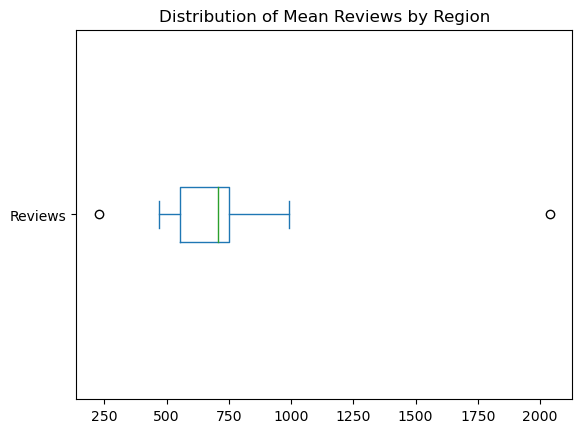

In [16]:
# Creating box plot for mean reviews by 'region'

mean_reviews_by_region.plot(kind = "box", 
                            vert=False,
                           title ="Distribution of Mean Reviews by Region");

In [17]:
#Calculting the mean ratings by region

mean_rating_by_region = df1.groupby("Region")["Rating"].mean().sort_values(ascending=False)
mean_rating_by_region

Region
A    4.733333
G    4.709091
C    4.671429
E    4.652632
I    4.638462
B    4.625000
D    4.571429
F    4.570000
H    4.542857
J    4.500000
Name: Rating, dtype: float64

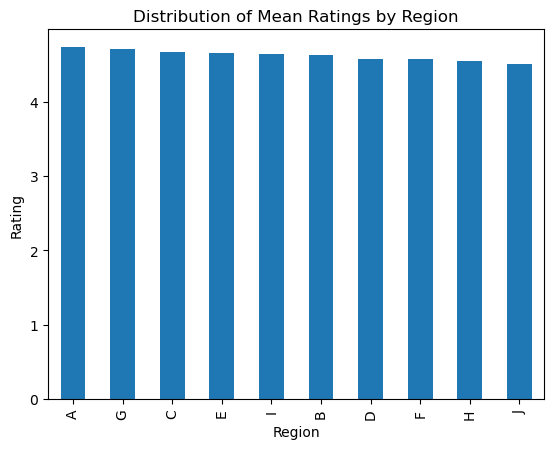

In [18]:
# Creating bar chart for mean ratings by 'region'


mean_rating_by_region.plot(kind="bar",
                xlabel= "Region",
                ylabel = "Rating",
                title ="Distribution of Mean Ratings by Region");

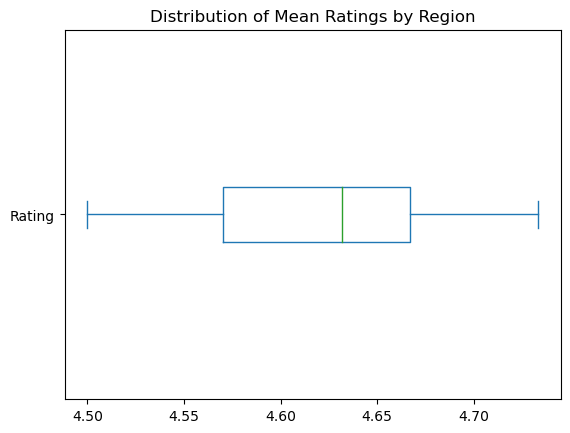

In [19]:
mean_rating_by_region.plot(kind = "box", 
                           vert=False,
                          title ="Distribution of Mean Ratings by Region");

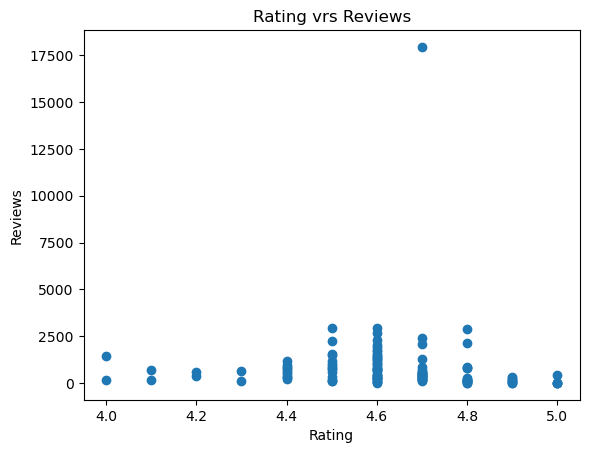

In [17]:
#plotting scatter plot for columns 'Region' and 'Rating'
plt.scatter(df1["Rating"],df1["Reviews"])
plt.xlabel("Rating")
plt.ylabel("Reviews")
plt.title("Rating vrs Reviews");

###### The scatter plot above tells that there is no  relationship betweeen the Region and Rating .

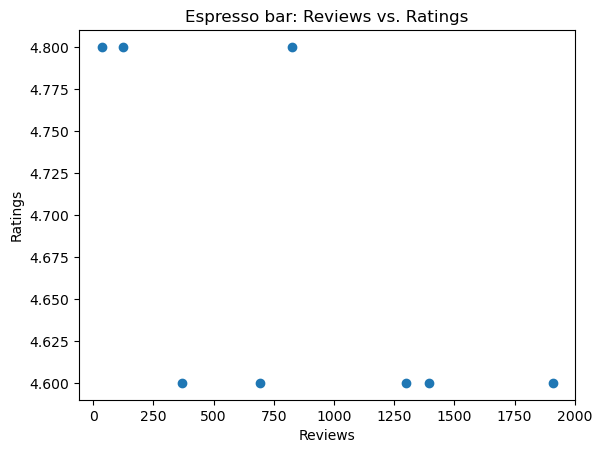

In [31]:
#Calculating the correlation between review and rating for the highest rated 'place type'

# Subset data
df1_Espresso_bar = df1[df1["Place type"]=="Espresso bar"]

# Build scatter plot
plt.scatter(df1_Espresso_bar["Reviews"],df1_Espresso_bar["Rating"])


# Label axes
plt.xlabel("Reviews")
plt.ylabel("Ratings")

# Add title
plt.title("Espresso bar: Reviews vs. Ratings")

plt.show();

###### There's no relationship betwen review and ratings as far as place type 'Espresso bar' is concern

In [36]:
#Calculating the correlation between reviews and ratings for place types
Place_type_corr = {
    'Espresso bar':df1[df1["Place type"]=='Espresso bar']['Reviews'].corr(df1[df1['Place type']=='Espresso bar']['Rating']),
    'Coffee shop':df1[df1["Place type"]=='Coffee shop']['Reviews'].corr(df1[df1['Place type']=='Coffee shop']['Rating']),
    'Other':df1[df1["Place type"]=='Other']['Reviews'].corr(df1[df1['Place type']=='Other']['Rating']),
    'Cafe':df1[df1["Place type"]=='Cafe']['Reviews'].corr(df1[df1['Place type']=='Cafe']['Rating'])
    
}

Place_type_corr

{'Espresso bar': -0.6294450192196857,
 'Coffee shop': -0.013187793402682401,
 'Other': nan,
 'Cafe': -0.26702268284019054}

###### With the above dictionary of place type correlation there's a negative correlation between the reviews and ratings of each place type . Therefore it can be concluded that the ratings and reviews of the dataframe is not based on the place type. Can therefore suggest that the reviews and ratings may be based on some factors including price,taste and service.